In [ ]:
pip install pyAgrum

     |████████████████████████████████| 4.9MB 32.6MB/s 


In [ ]:
import requests

import pandas as pd
from collections import OrderedDict
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from pylab import *

from collections import Counter
from IPython.core.display import display, HTML
import time
import logging

import pyAgrum.skbn as skbn
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
from pyAgrum.lib.bn2roc import showROC


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report, accuracy_score
from sklearn.base import BaseEstimator, ClassifierMixin

from sklearn.linear_model import LinearRegression




# Format
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiter les sorties à 4 decimals
pd.set_option('display.max_columns', None)

display(HTML("<style>.container { width:100% !important; }</style>"))

%matplotlib inline

### Récupération des données dans @Web

In [ ]:
pload = [('query',"""PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX atweb:<http://opendata.inra.fr/resources/WHEAT#>
PREFIX atweb-data:<http://opendata.inra.fr/resources/atWeb/annotation/>
PREFIX atweb-core:<http://opendata.inra.fr/resources/core#>
PREFIX base:<http://opendata.inra.fr/data/atWeb/>
PREFIX id: <uri à renseigner>

SELECT ?proteinContent
        ?alveolab_G ?alveolab_L ?alveolab_P ?alveolab_W ?alveolab_Ie ?alveolab_PL
        ?totalscore ?NoteVolume
        ?DevelopmentOfSlashed
WHERE {
    GRAPH id:Document_1985{
########################################PROTEIN CONTENT###################################################################
    ?proteinContentRelation rdf:type atweb:grain_protein. 
    ?proteinContentRelation atweb-core:hasResultConcept ?proteinContentResultConcept.
    ?proteinContentRelation atweb-core:hasAccessConcept ?proteinContentAccesConcept.

    ?proteinContentAccesConcept rdf:type atweb:samplecode.
    ?proteinContentAccesConcept atweb-data:hasForOriginalValue ?samplecodeproteinContent.
    
    
    ?proteinContentResultConcept atweb-data:hasForFS ?proteinContentFuzzySet.
    ?proteinContentFuzzySet atweb-data:hasForFuzzyElement ?proteinContentFuzzySetElement.
    ?proteinContentFuzzySetElement atweb-data:hasForMinKernel ?proteinContent.
#################################ALVEOLAB CHARACTERISATION##############################################################
    ?alveolabRelation rdf:type atweb:alveolab_characterisation. 
##################################SampleCode##########################################################
    ?alveolabRelation atweb-core:hasAccessConcept ?samplecodeAccesConcept.
    ?samplecodeAccesConcept rdf:type atweb:samplecode.
    ?samplecodeAccesConcept atweb-data:hasForOriginalValue ?samplecode.
##################################ALVEOLAB L#######################################################
    ?alveolabRelation atweb-core:hasAccessConcept ?alveolab_LAccesConcept.
    ?alveolab_LAccesConcept rdf:type atweb:alveolab_l.
    ?alveolab_LAccesConcept atweb-data:hasForFS ?alveolab_LHFFS.
    ?alveolab_LHFFS atweb-data:hasForFuzzyElement ?alveolab_LHFE.
    ?alveolab_LHFE atweb-data:hasForMinKernel ?alveolab_L.
##################################ALVEOLAB G#########################################################
    ?alveolabRelation atweb-core:hasAccessConcept ?alveolab_GAccesConcept.
    ?alveolab_GAccesConcept rdf:type atweb:alveolab_g.
    ?alveolab_GAccesConcept atweb-data:hasForFS ?alveolab_GHFFS.
    ?alveolab_GHFFS atweb-data:hasForFuzzyElement ?alveolab_GHFE.
    ?alveolab_GHFE atweb-data:hasForMinKernel ?alveolab_G.
##################################ALVEOLAB W#########################################################
    ?alveolabRelation atweb-core:hasAccessConcept ?alveolab_WAccesConcept.
    ?alveolab_WAccesConcept rdf:type atweb:alveolab_w.
    ?alveolab_WAccesConcept atweb-data:hasForFS ?alveolab_WHFFS.
    ?alveolab_WHFFS atweb-data:hasForFuzzyElement ?alveolab_WHFE.
    ?alveolab_WHFE atweb-data:hasForMinKernel ?alveolab_W.
##################################ALVEOLAB P#########################################################
    ?alveolabRelation atweb-core:hasAccessConcept ?alveolab_PAccesConcept.
    ?alveolab_PAccesConcept rdf:type atweb:alveolab_p.
    ?alveolab_PAccesConcept atweb-data:hasForFS ?alveolab_PHFFS.
    ?alveolab_PHFFS atweb-data:hasForFuzzyElement ?alveolab_PHFE.
    ?alveolab_PHFE atweb-data:hasForMinKernel ?alveolab_P.
##################################ALVEOLAB P/L#########################################################
    ?alveolabRelation atweb-core:hasAccessConcept ?alveolab_PLAccesConcept.
    ?alveolab_PLAccesConcept rdf:type atweb:alveolab_p_l.
    ?alveolab_PLAccesConcept atweb-data:hasForFS ?alveolab_PLHFFS.
    ?alveolab_PLHFFS atweb-data:hasForFuzzyElement ?alveolab_PLHFE.
    ?alveolab_PLHFE atweb-data:hasForMinKernel ?alveolab_PL.
##################################ALVEOLAB Ie#########################################################
    ?alveolabRelation atweb-core:hasAccessConcept ?alveolab_IeAccesConcept.
    ?alveolab_IeAccesConcept rdf:type atweb:alveolab_ie.
    ?alveolab_IeAccesConcept atweb-data:hasForFS ?alveolab_IeHFFS.
    ?alveolab_IeHFFS atweb-data:hasForFuzzyElement ?alveolab_IeHFE.
    ?alveolab_IeHFE atweb-data:hasForMinKernel ?alveolab_Ie.    

#################################BreadMakingTest CHARACTERISATION######################################################
    ?BreadMakingTestRelation rdf:type atweb:breadmakingtest_characterisation. 
##################################SampleCode BreadMaking Test##########################################################
    ?BreadMakingTestRelation atweb-core:hasAccessConcept ?samplecodeAccesConcept.
    ?samplecodeAccesConcept rdf:type atweb:samplecode.
    ?samplecodeAccesConcept atweb-data:hasForOriginalValue ?samplecodeBreadMaking.
################################# NOTES #############################################################
####################################NOTE PANIFICATION#########################################################
    ?BreadMakingTestRelation atweb-core:hasResultConcept ?totalscoreResultConcept.
    ?totalscoreResultConcept rdf:type atweb:total_score.
    ?totalscoreResultConcept atweb-data:hasForFS ?totalscoreHFFS.
    ?totalscoreHFFS atweb-data:hasForFuzzyElement ?totalscoreHFE.
    ?totalscoreHFE atweb-data:hasForMaxKernel ?totalscore.  
####################################Note Of Bread#########################################################
    ?BreadMakingTestRelation atweb-core:hasAccessConcept ?NoteBreadAccesConcept.
    ?NoteBreadAccesConcept rdf:type atweb:note_of_bread.
    ?NoteBreadAccesConcept atweb-data:hasForFS ?NoteBreadHFFS.
    ?NoteBreadHFFS atweb-data:hasForFuzzyElement ?NoteBreadHFE.
    ?NoteBreadHFE atweb-data:hasForMaxKernel ?NoteBread.
####################################Note Of Dough#########################################################
    ?BreadMakingTestRelation atweb-core:hasAccessConcept ?NoteDoughAccesConcept.
    ?NoteDoughAccesConcept rdf:type atweb:note_of_dough.
    ?NoteDoughAccesConcept atweb-data:hasForFS ?NoteDoughHFFS.
    ?NoteDoughHFFS atweb-data:hasForFuzzyElement ?NoteDoughHFE.
    ?NoteDoughHFE atweb-data:hasForMaxKernel ?NoteDough.
####################################Note Volume #########################################################
    ?BreadMakingTestRelation atweb-core:hasAccessConcept ?NoteVolumeAccesConcept.
    ?NoteVolumeAccesConcept rdf:type atweb:note_volume.
    ?NoteVolumeAccesConcept atweb-data:hasForFS ?NoteVolumeHFFS.
    ?NoteVolumeHFFS atweb-data:hasForFuzzyElement ?NoteVolumeHFE.
    ?NoteVolumeHFE atweb-data:hasForMaxKernel ?NoteVolume.

########################################Scarification CHARACTERISATION##############################################
##################################DevelopmentOfSlashes####################################################
    ?BreadMakingTestRelation atweb-core:hasAccessConcept ?DevelopmentOfSlashesAccesConcept.
    ?DevelopmentOfSlashesAccesConcept rdf:type atweb:development_of_slashed_dough_piece.
    ?DevelopmentOfSlashesAccesConcept atweb-data:hasForFS ?DevelopmentOfSlashesHFFS.
    ?DevelopmentOfSlashesHFFS atweb-data:hasForFuzzyElement ?DevelopmentOfSlashesHFE.
    ?DevelopmentOfSlashesHFE atweb-data:hasForMaxKernel ?DevelopmentOfSlashed.

    FILTER ((?samplecodeproteinContent = ?samplecode)
        &&(?samplecodeproteinContent = ?samplecodeBreadMaking))

    }
}""")]

r = requests.post('https://icotest.iate.inra.fr/fuseki/annotation', data=pload, verify =False, timeout=10)
data = r.json()
# print(data)

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


### Mettre les données dans un DF 

In [ ]:
arvalis = []
for item in data['results']['bindings']:
  arvalis.append(OrderedDict({
      'protein': item['proteinContent']['value'],
      'alveolabG':item['alveolab_G']['value'],
      'alveolabL':item['alveolab_L']['value'],
      'alveolabP': item['alveolab_P']['value'],
      'alveolabW': item['alveolab_W']['value'],
      'alveolabIe': item['alveolab_Ie']['value'],
      'alveolabPL': item['alveolab_PL']['value'],
      'notePanif': item['totalscore']['value'],
      'coupDeLame': item['DevelopmentOfSlashed']['value'],
      'volume': item['NoteVolume']['value']
  }))

df = pd.DataFrame(arvalis)

In [ ]:
### Conversion des objets en int
for i in range(0, len(df.columns)):
    df.iloc[:,i] = pd.to_numeric(df.iloc[:,i], errors='ignore')

### Discretisation supervisée

In [ ]:
#Fonction de discretisation avec l'expertise du domaine
def foralveolabG(row):	
  alveolabG = float(row['alveolabG'])
  if alveolabG < 20:
    return 'faible'
  elif alveolabG < 22:
    return 'un peu faible'
  elif alveolabG < 24:
    return 'moyen'
  elif alveolabG < 26:
    return 'eleve'
  else :
    return 'tres eleve'

def foralveolabW(row):
  alveolabW = float(row['alveolabW'])
  if alveolabW < 140:
    return 'faible'
  elif alveolabW < 170:
    return 'un peu faible'
  elif alveolabW < 200:
    return 'moyen'
  elif alveolabW < 230:
    return 'eleve'
  else :
    return 'tres eleve'

def foralveolabP(row):
  alveolabP = float(row['alveolabP'])
  if alveolabP < 40:
    return 'faible'
  elif alveolabP < 70:
    return 'moyen'
  else :
    return 'tres eleve'

def foralveolabIe(row):
   alveolabIe = float(row['alveolabIe'])
   if alveolabIe < 35:
      return 'faible'
   elif alveolabIe < 45:
      return 'un peu faible'
   elif alveolabIe < 50:
    return 'moyen'
   elif alveolabIe < 60:
    return 'eleve'
   else :
    return 'tres eleve'



def forproteinContent(row):	
  proteinContent = float(row['protein'])
  if proteinContent < 9.5 :
    return 'faible'
  elif proteinContent < 10.5:
    return 'un peu faible'
  elif proteinContent < 11.5:
     return 'moyen'
  elif proteinContent < 12.5:
    return 'un peu eleve'
  else :
    return 'eleve'


def forcoupDeLame(row):
  coupDeLame = float(row['coupDeLame'])
  if coupDeLame == -1:
    return 'très insuffisant'
  elif coupDeLame == -4:
    return 'insuffisant'
  elif coupDeLame == -7:
        return 'un peu insuffisant'
  elif coupDeLame == 10:
        return 'normal'
  elif coupDeLame == 7:
        return 'un peu eleve'


def forvolume(row):
  volume = float(row['volume'])
  if volume < 10:
        return 'normal'
  elif volume > 10:
        return 'un peu excessif'
  elif volume 	> 20:
        return 'excessif'




In [ ]:
#Application dans le dataFrame
df['volume']= df.apply(forvolume, axis=1)
df['protein']= df.apply(forproteinContent, axis=1)
df['alveolabG']= df.apply(foralveolabG, axis=1)
df['alveolabIe']= df.apply(foralveolabIe, axis =1)
df['alveolabP']=df.apply(foralveolabP, axis=1)
df['alveolabW']=df.apply(foralveolabW, axis=1)
df['coupDeLame']=df.apply(forcoupDeLame, axis=1)



In [ ]:
df

,protein,alveolabG,alveolabL,alveolabP,alveolabW,alveolabIe,alveolabPL,notePanif,coupDeLame,volume
0,moyen,faible,73,moyen,un peu faible,un peu faible,0.920,240,normal,un peu excessif
1,eleve,faible,78,moyen,un peu faible,un peu faible,0.870,205,un peu insuffisant,un peu excessif
2,un peu eleve,un peu faible,87,moyen,un peu faible,un peu faible,0.790,221,un peu insuffisant,normal
3,un peu eleve,faible,64,tres eleve,moyen,un peu faible,1.470,236,normal,un peu excessif
4,eleve,un peu faible,82,tres eleve,moyen,moyen,0.850,226,un peu insuffisant,normal
...,...,...,...,...,...,...,...,...,...,...
80,eleve,un peu faible,85,tres eleve,eleve,moyen,1.000,222,un peu insuffisant,un peu excessif
81,eleve,faible,66,tres eleve,eleve,moyen,1.470,210,insuffisant,normal
82,eleve,faible,59,tres eleve,tres eleve,moyen,2.120,229,un peu insuffisant,normal
83,eleve,faible,69,tres eleve,tres eleve,eleve,1.390,236,un peu insuffisant,normal


In [ ]:
# Les variables non discrétisées dans ce dataframe est du à une manque d'information de la part des partenaires. Elles seront discrétisées avec la méthode du Percentile

### Apprentissage Automatique avec BN

In [ ]:
pip install pyagrum pydotplus

In [ ]:
# Functions    

def post(row,bn,target):
        ie = gum.LazyPropagation(bn)
        evs = row.astype(str).to_dict()
        #print(evs)
        del evs[target]
        ie.setEvidence(evs)
        ie.addTarget(target)
        return ie.posterior(target).toarray()[1]

In [ ]:
# Wrapper class
class BNEstimator(BaseEstimator, ClassifierMixin):
    """
    csv_template is used to create the modalities for the BN"""
    def __init__(self,
                 csv_template=None,
                 bn=None,
               mandatory_arcs=[],
               tabu_arcs=[],
               class_name = None,
               learning_method='greedy',
               prior='likelihood', 
               prior_weight=.5, 
               positif_label = None,
               threshold = .5,
               nb_classes = 2,               
               cut_points_percentiles  = list(100*np.linspace(0, 1,5)),
               bins=5):
        
        
        self.csv_template = csv_template
        self.mandatory_arcs = mandatory_arcs
        self.tabu_arcs = tabu_arcs
        self.class_name = class_name
        self.learning_method = learning_method
        self.prior = prior
        self.prior_weight = prior_weight
        self.positif_label = positif_label
        self.threshold = threshold
        self.nb_classes = nb_classes
        self.cut_points_percentiles = cut_points_percentiles
        self.bins = bins
        self.bn = bn
    
    
    def get_params(self, deep=True):
        return {"csv_template":self.csv_template,# template for modalities
            "class_name":self.class_name,
            "mandatory_arcs": self.mandatory_arcs,
                "tabu_arcs":self.tabu_arcs,
                "learning_method": self.learning_method, 
               "prior": self.prior,
               "prior_weight":  self.prior_weight,
              "class_name"  :self.class_name ,
              "positif_label"  :self.positif_label ,
              "threshold" : self.threshold ,
              "nb_classes"  :self.nb_classes ,
              "cut_points_percentiles"  :self.cut_points_percentiles,
            "bins" : self.bins}

    
    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self
    
     
    def transform(self,d):
        """Transfrom the whole dataset before training
        param d : dataframe 
        """
        template = gum.BayesNet()
        numeric_cols = list(d.select_dtypes(include=[np.number]).columns)
        categorical_cols = list(d.select_dtypes(include=[object]).columns)

        
        for col in numeric_cols:
            if d[col].value_counts().shape[0]>self.bins:
                x = d[col].values.flatten()
                x.sort()
                cut_points = np.percentile(x, self.cut_points_percentiles)
                d.loc[:,col]= np.digitize(x, cut_points, right=False)   
                del x
            template.add(gum.LabelizedVariable(col,col,list(map(str,d[col].value_counts().index)))) 
        for col in categorical_cols:
            if d[col].value_counts().shape[0]>self.bins:
                top = d[col].isin(d[col].value_counts().index[:self.bins])
                d.loc[~top, col] = "else_top_"+str(self.bins)

                del top
            template.add(gum.LabelizedVariable(col,col,list(map(str,d[col].value_counts().index))))
        return template,d
        
        
    def fit(self,data,y=None):
        """Create the template and Fit the training dataset: data_file"""
        
        # create the template   
        template,_ = self.transform(pd.read_csv(self.csv_template))
        _,train= self.transform(data)
                
            
        train.to_csv('train_bn.csv',index=False)
        learner = gum.BNLearner('train_bn.csv', template)

        
        for i in self.tabu_arcs: learner.addForbiddenArc(i[0],i[1])
        for i in self.mandatory_arcs :  learner.addMandatoryArc(i[0],i[1])

        if self.learning_method == 'greedy':learner.useGreedyHillClimbing()
        else: learner.useMIIC()

        if self.prior == "laplace":learner.useAprioriSmoothing(self.prior_weight)
        else:learner.useNoApriori()
            
        
        self.bn = learner.learnBN()
        self.bn = learner.learnParameters(self.bn.dag())        
        del template,train

        return self
   
    def predict_one_row(self,row):
        ie = gum.LazyPropagation(self.bn)
        ie.addTarget(self.class_name) 
        
        evs = row.astype(str).to_dict()
        del evs[self.class_name]      
        ie.setEvidence(evs)
        ie.makeInference()
        return ie.posterior(self.class_name).toarray()
        
       
    def predict_proba1(self,test):#,mb=True):
        scores = np.empty([test.shape[0], self.nb_classes])
        scores[:] = np.nan
        ie = gum.LazyPropagation(self.bn)
        ie.addTarget(self.class_name) 
        
        for i in range(len(test)):    
            evs = test.iloc[i,:].astype(str).to_dict()
            del evs[self.class_name]               
            ie.setEvidence(evs)
            ie.makeInference()
            scores[i] = ie.posterior(self.class_name).toarray()
        return scores

   
    def predict_proba(self, Xtest):
        if type(Xtest) is np.ndarray:
            Xtest = pd.DataFrame(Xtest, columns=["X{}".format(i) for i in range(Xtest.shape[1])])

        Yscores = np.empty([Xtest.shape[0], self.nb_classes])
        Yscores[:] = np.nan

        mbnames = [self.bn.variable(i).name()
                   for i in gum.MarkovBlanket(self.bn, self.class_name).nodes()
                   if self.bn.variable(i).name() != self.class_name]
        ie = gum.LazyPropagation(self.bn)
        for var in ie.BN().names():  
            if var != self.class_name:
                ie.addEvidence(var, 0)
        ie.addTarget(self.class_name)

        Xtest = Xtest.reset_index(drop=True)

        for line in Xtest.itertuples():
            for var in mbnames:
                try:
                    idx = self.bn.variable(var).index(str(getattr(line, var)))
                    ie.chgEvidence(var, idx)
                except gum.GumException:
                # this can happen when value is missing is the test base.
                    print("[pyAgrum] ** pyAgrum.lib.classifier : The value {getattr(line, var)} for the variable {var} is missing in the training set.")
                    pass

            ie.makeInference()

            marginal = ie.posterior(self.class_name)
            Yscores[line[0]] = marginal.toarray()

        return Yscores
    
    
    def predict(self,test):
        y_scores = self.predict_proba(test)[:,1]
        y_true = test[self.class_name]
        
        return y_true, np.where(y_scores >= self.threshold, 1, 0)
    
 
    def score(self,test):
        y_true,y_pred = self.predict(test)
        print(classification_report(y_true, y_pred))
        print(5*'--')
        print('recall_score')
        return recall_score(y_true, y_pred)

## Construction du RB

In [ ]:
##Construction du réseau sans la connaissance expert
df.to_csv('template.csv', index = False)

clf = BNEstimator(csv_template='template.csv', class_name='notePanif',
                  cut_points_percentiles = [5, 50, 95])
_,data = clf.transform(df)

train,test = train_test_split(data ,test_size=0.25, random_state=42)
train.to_csv('train.csv',index=False)

clf.fit(train)

BNEstimator(bins=5, class_name='notePanif', csv_template='template.csv',
            cut_points_percentiles=[5, 50, 95], learning_method='greedy',
            mandatory_arcs=[], nb_classes=2, positif_label=None,
            prior='likelihood', prior_weight=0.5, tabu_arcs=[], threshold=0.5)

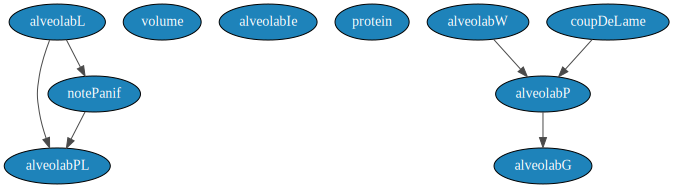

In [ ]:

gnb.showBN(clf.bn,size=12,nodeColor={n:0.66 for n in clf.bn.names()},cmap=plt.cm.get_cmap('YlGnBu'))

In [ ]:
## Prise en compte de la connaissance expert
df.to_csv('template.csv', index = False)

clf = BNEstimator(csv_template='template.csv', class_name='notePanif',
                  tabu_arcs=[('volume', 'notePanif'),('coupDeLame', 'notePanif')],
                  mandatory_arcs=[('alveolabPL','notePanif'),('alveolabP','notePanif'),('alveolabG','notePanif'),('alveolabIe','notePanif'),('alveolabW','notePanif'),('protein','notePanif')],
                  cut_points_percentiles = [5, 50, 95]) #Discretisation des autres variables ou l'expertise est absente
_,data = clf.transform(df)

train,test = train_test_split(data ,test_size=0.25, random_state=42)
train.to_csv('train.csv',index=False)


train.to_csv('train.csv',index=False)
test.to_csv('test.csv',index=False)

clf.fit(train)


clf.fit(train)

BNEstimator(bins=5, class_name='notePanif', csv_template='template.csv',
            cut_points_percentiles=[5, 50, 95], learning_method='greedy',
            mandatory_arcs=[('alveolabPL', 'notePanif'),
                            ('alveolabP', 'notePanif'),
                            ('alveolabG', 'notePanif'),
                            ('alveolabIe', 'notePanif'),
                            ('alveolabW', 'notePanif'),
                            ('protein', 'notePanif')],
            nb_classes=2, positif_label=None, prior='likelihood',
            prior_weight=0.5,
            tabu_arcs=[('volume', 'notePanif'), ('coupDeLame', 'notePanif')],
            threshold=0.5)

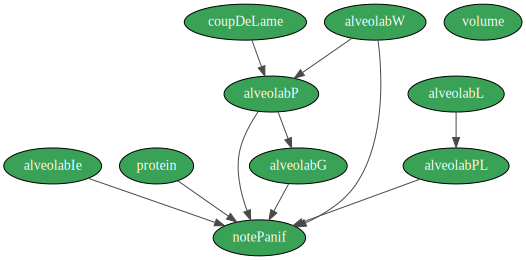

In [ ]:
gnb.showBN(clf.bn,size=12,nodeColor={n:0.66 for n in clf.bn.names()},cmap=plt.cm.get_cmap('Greens'))

### Tableau de Probabilité Jointe

In [ ]:
clf.bn.cpt(clf.bn.idFromName('notePanif')) #Tableau de distribution de probalité

(gum::Potential<double>@0x5637f82dbfe0) 
                                         ||  notePanif                            |
alveol|alveol|alveol|alveol|alveol|protei||2        |1        |3        |0        |
------|------|------|------|------|------||---------|---------|---------|---------|
2     |tres e|faible|un peu|moyen |eleve || 0.2500  | 0.2500  | 0.2500  | 0.2500  |
1     |tres e|faible|un peu|moyen |eleve || 0.0001  | 0.9998  | 0.0001  | 0.0001  |
3     |tres e|faible|un peu|moyen |eleve || 0.2500  | 0.2500  | 0.2500  | 0.2500  |
0     |tres e|faible|un peu|moyen |eleve || 0.2500  | 0.2500  | 0.2500  | 0.2500  |
2     |moyen |faible|un peu|moyen |eleve || 0.2500  | 0.2500  | 0.2500  | 0.2500  |
1     |moyen |faible|un peu|moyen |eleve || 0.2500  | 0.2500  | 0.2500  | 0.2500  |
[...3988 more line(s) ...]
3     |tres e|tres e|faible|tres e|faible|| 0.2500  | 0.2500  | 0.2500  | 0.2500  |
0     |tres e|tres e|faible|tres e|faible|| 0.2500  | 0.2500  | 0.2500  | 0.2500  |
2     |moyen |tres e|faible|tres e|faible|| 0.2500  | 0.2500  | 0.2500  | 0.2500  |
1     |moyen |tres e|faible|tres e|faible|| 0.2500  | 0.2500  | 0.2500  | 0.2500  |
3     |moyen |tres e|faible|tres e|faible|| 0.2500  | 0.2500  | 0.2500  | 0.2500  |
0     |moyen |tres e|faible|tres e|faible|| 0.2500  | 0.2500  | 0.2500  | 0.2500  |

### Spécification avec la méthode de Markov

In [ ]:
gum.MarkovBlanket(clf.bn,'notePanif')

<pyAgrum.pyAgrum.MarkovBlanket; proxy of <Swig Object of type 'gum::MarkovBlanket *' at 0x7f956ab3cbd0> >

### Inférence

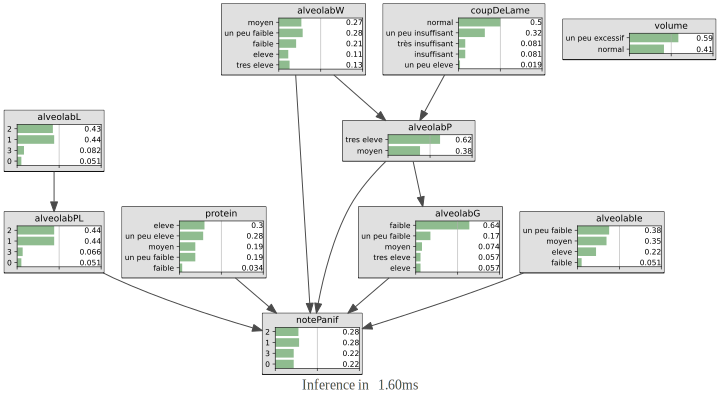

In [ ]:
gnb.showInference(clf.bn,size="10")

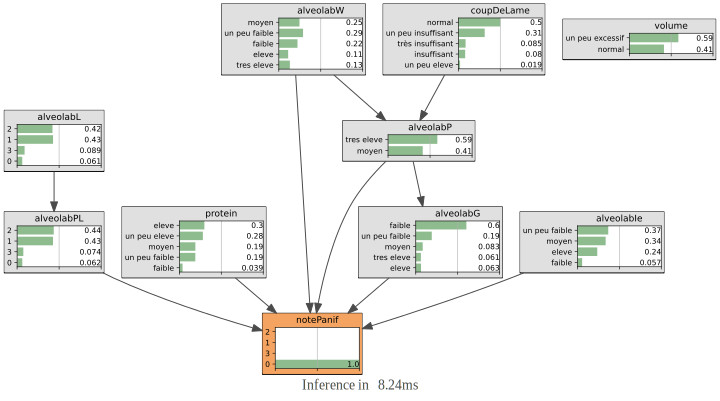

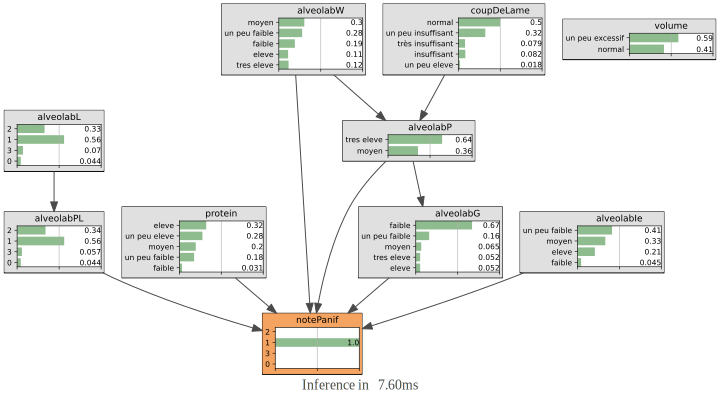

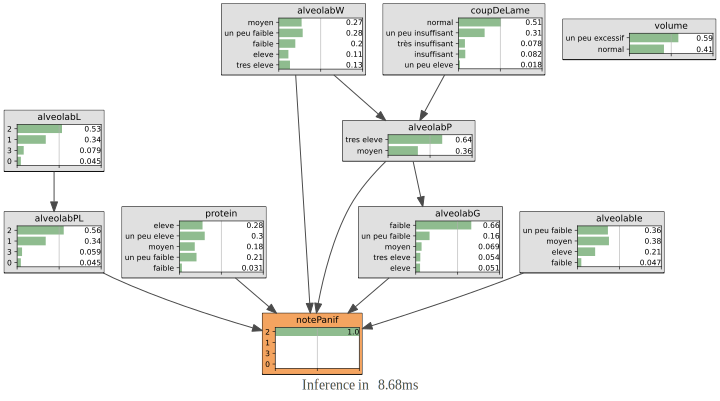

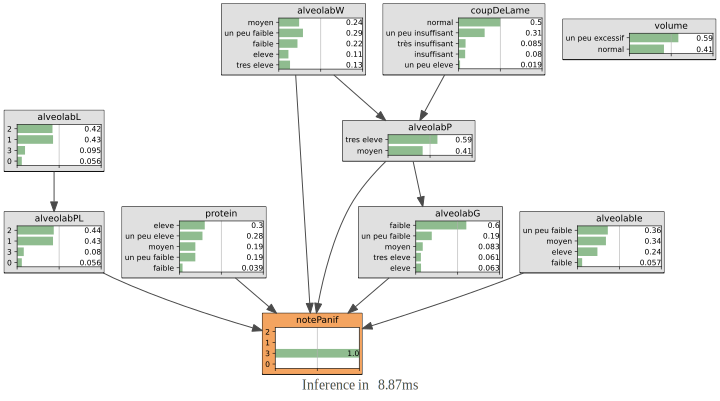

In [ ]:
gnb.showInference(clf.bn,size="10", evs={'notePanif':'0'})
gnb.showInference(clf.bn,size="10", evs={'notePanif':'1'})
gnb.showInference(clf.bn,size="10", evs={'notePanif':'2'})
gnb.showInference(clf.bn,size="10", evs={'notePanif':'3'})

### Faisons des tests 

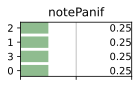

In [ ]:
gnb.showPosterior(clf.bn, evs={'alveolabL':'2', 'alveolabG':'eleve','alveolabIe':'eleve','alveolabW':'eleve','alveolabPL':'2','protein':'eleve'},
                 target='notePanif')

In [ ]:
gum.MarkovBlanket(clf.bn,'notePanif')


<pyAgrum.pyAgrum.MarkovBlanket; proxy of <Swig Object of type 'gum::MarkovBlanket *' at 0x7f741e462030> >

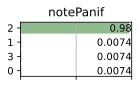

In [ ]:
d_test = pd.read_csv('test.csv')
row = d_test.loc[1,:]
evs = row.astype(str).to_dict()

evidence = {'alveolabL':'3', 'alveolabG':'faible','alveolabIe':'moyen','alveolabW':'eleve','alveolabPL':'2','protein':'eleve'
           }


gnb.showPosterior(clf.bn,
                 target='notePanif',
                 evs=evidence)

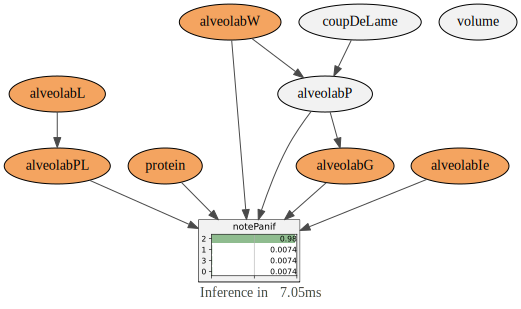

In [ ]:
MB = gum.MarkovBlanket(clf.bn,'notePanif')

gnb.showInference(clf.bn, 
                  nodeColor={n:0.9 for n in clf.bn.names()},
                  evs=evidence,
                  targets={'notePanif'},
                  size=8)

### Gains en memoire

In [ ]:
def get_jpd_size(bn):
    return np.prod([bn.variable(node).domainSize() for node in bn.nodes()])

def get_cpts_size(bn):
    return sum([np.prod(bn.cpt(node).var_dims) for node in bn.nodes() ])  

def compression_ratio(bn):
    return 100*(1-get_cpts_size(bn)/ get_jpd_size(bn))

In [ ]:
##Pour stocker les distributions de probabiltés jointes, nous devons stocker 640000 entrées, qui sont le produit de toutes les tailles de modalité dans le DPJ
get_jpd_size(clf.bn)

640000

In [ ]:
## Nous avons un gain de mémoire de 97%
compression_ratio(clf.bn)

97.48421875